# (2m) Ground truth sorting accuracy

author: steeve.laquitaine@epfl.ch  
date: 25.10.2024


**method**

* first 10 minutes
* single-units whenever possible

## Setup

activate `spikeinterf..`

In [15]:
%load_ext autoreload
%autoreload 2
import os 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import spikeinterface as si
from scipy import stats

# set project path
proj_path = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
os.chdir(proj_path)

from src.nodes import utils
from src.nodes.utils import get_config
from src.nodes.metrics import quality
from src.nodes.analysis.accuracy import accuracy as acc

# PARAMETERS
DUR = 600 # 10 minutes recording
DT = 1.3 # ms (optimized)
THR_GOOD = 0.8

# DATASETS

# NPX PROBE
# Synthetic (10m)
cfg_nb, _ = get_config("buccino_2020", "2020").values()
GT_nb_10m = cfg_nb["ground_truth"]["10m"]["output"]
KS4_nb_10m = cfg_nb["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
KS3_nb_10m = cfg_nb["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
KS2_5_nb_10m = cfg_nb["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
KS2_nb_10m = cfg_nb["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
KS_nb_10m = cfg_nb["sorting"]["sorters"]["kilosort"]["10m"]["output"]
HS_nb_10m = cfg_nb["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]
REC_nb = cfg_nb["probe_wiring"]["full"]["output"]

# biophy spont (10m)
cfg_ns, _ = get_config("silico_neuropixels", "npx_spont").values()
KS4_ns_10m = cfg_ns["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
KS3_ns_10m = cfg_ns["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
KS2_5_ns_10m = cfg_ns["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
KS2_ns_10m = cfg_ns["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
KS_ns_10m = cfg_ns["sorting"]["sorters"]["kilosort"]["10m"]["output"]
HS_ns_10m = cfg_ns["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]
GT_ns_10m = cfg_ns["ground_truth"]["10m"]["output"]
REC_ns = cfg_ns["probe_wiring"]["full"]["output"]

# # biophy evoked
# cfg_e, _ = get_config("silico_neuropixels", "npx_evoked").values()
# KS4_e_10m = cfg_e["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
# KS3_e_10m = cfg_e["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
# KS2_5_e_10m = cfg_e["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
# KS2_e_10m = cfg_e["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
# KS_e_10m = cfg_e["sorting"]["sorters"]["kilosort"]["10m"]["output"]
# HS_e_10m = cfg_e["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]
# GT_e_10m = cfg_e["ground_truth"]["10m"]["output"]
# REC_e = cfg_e["probe_wiring"]["full"]["output"]

# DENSE PROBE 
# depth 1
cfg_ds1, _ = get_config("dense_spont", "probe_1").values()
K4_d1 = cfg_ds1["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
K3_d1 = cfg_ds1["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
K25_d1 = cfg_ds1["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
K2_d1 = cfg_ds1["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
K_d1 = cfg_ds1["sorting"]["sorters"]["kilosort"]["10m"]["output"]
H_d1 = cfg_ds1["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]
R_d1 = cfg_ds1["probe_wiring"]["full"]["output"]
T_d1 = cfg_ds1["ground_truth"]["10m"]["output"]

# depth 2
cfg_ds2, _ = get_config("dense_spont", "probe_2").values()
K4_d2 = cfg_ds2["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
K3_d2 = cfg_ds2["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
K25_d2 = cfg_ds2["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
K2_d2 = cfg_ds2["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
K_d2 = cfg_ds2["sorting"]["sorters"]["kilosort"]["10m"]["output"]
H_d2 = cfg_ds2["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]
R_d2 = cfg_ds2["probe_wiring"]["full"]["output"]
T_d2 = cfg_ds2["ground_truth"]["10m"]["output"]

# depth 3
cfg_ds3, _ = get_config("dense_spont", "probe_3").values()
K4_d3 = cfg_ds3["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
K3_d3 = cfg_ds3["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
K25_d3 = cfg_ds3["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
K2_d3 = cfg_ds3["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
K_d3 = cfg_ds3["sorting"]["sorters"]["kilosort"]["10m"]["output"]
H_d3 = cfg_ds3["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]
R_d3 = cfg_ds3["probe_wiring"]["full"]["output"]
T_d3 = cfg_ds3["ground_truth"]["10m"]["output"]

# biophy evoked
cfg_e, _ = get_config("others/spikewarp", "2024_04_13").values()
KS4_e_10m = cfg_e["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
KS3_e_10m = cfg_e["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
KS2_5_e_10m = cfg_e["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
KS2_e_10m = cfg_e["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
KS_e_10m = cfg_e["sorting"]["sorters"]["kilosort"]["10m"]["output"]
HS_e_10m = cfg_e["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]
GT_e_10m = cfg_e["ground_truth"]["10m"]["output"]
REC_e = cfg_e["probe_wiring"]["full"]["output"]

# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.5 # typically between 0.5 and 1
plt.rcParams["axes.linewidth"] = 0.5 #1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
# legend
legend_cfg = {"frameon": False, "handletextpad": 0.5}
tight_layout_cfg = {"pad": 0.001}
LG_FRAMEON = False              # no legend frame

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-12-02 11:57:26,281 - root - utils.py - get_config - INFO - Reading experiment config.
2024-12-02 11:57:26,306 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-12-02 11:57:26,308 - root - utils.py - get_config - INFO - Reading experiment config.
2024-12-02 11:57:26,342 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-12-02 11:57:26,344 - root - utils.py - get_config - INFO - Reading experiment config.
2024-12-02 11:57:26,375 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-12-02 11:57:26,376 - root - utils.py - get_config - INFO - Reading experiment config.
2024-12-02 11:57:26,407 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-12-02 11:57:26,408 - root - utils.py - get_config - INFO - Reading experiment config.
2024-12-02 11:57:26,440 - root - utils.py - get_config - INFO - R

In [7]:
# NE
ac_e = acc.get_accuracy(
    KS4_e_10m, KS3_e_10m, KS2_5_e_10m, KS2_e_10m, KS_e_10m, HS_e_10m, GT_e_10m, DT
)

In [8]:
def get_good_unit_yield_and_accuracy(acc_data, sorter):
    sorters = np.array(["KS4", "KS3", "KS2.5", "KS2", "KS", "HS"])
    s_ix = np.where(sorters == sorter)[0][0]
    good_yield = sum(acc_data[s_ix, :] >= 0.8)
    acc = good_yield / acc_data.shape[1]
    print(f"{sorters[s_ix]} - accuracy {acc}; good unit yield {good_yield}")
    return acc, good_yield


acc_e_k4, good_yiel_e_k4 = get_good_unit_yield_and_accuracy(ac_e, "KS4")
acc_e_k3, good_yiel_e_k3 = get_good_unit_yield_and_accuracy(ac_e, "KS3")
acc_e_k25, good_yiel_e_k25 = get_good_unit_yield_and_accuracy(ac_e, "KS2.5")
acc_e_k2, good_yiel_e_k2 = get_good_unit_yield_and_accuracy(ac_e, "KS2")
acc_e_ks, good_yiel_e_ks = get_good_unit_yield_and_accuracy(ac_e, "KS")
acc_e_hs, good_yiel_e_hs = get_good_unit_yield_and_accuracy(ac_e, "HS")

KS4 - accuracy 0.07925257731958762; good unit yield 123
KS3 - accuracy 0.07216494845360824; good unit yield 112
KS2.5 - accuracy 0.0740979381443299; good unit yield 115
KS2 - accuracy 0.07731958762886598; good unit yield 120
KS - accuracy 0.14368556701030927; good unit yield 223
HS - accuracy 0.05154639175257732; good unit yield 80


In [52]:
def plot_sorting_accuracy_dense(ax, ac_d1, ac_d2, ac_d3, thres, sorters, ylim, colors):

    # get number of well sorted ground truth units
    nb_good_d1 = (ac_d1 >= thres).sum(axis=1)
    nb_good_d2 = (ac_d2 >= thres).sum(axis=1)
    nb_good_d3 = (ac_d3 >= thres).sum(axis=1)

    # total nb of units (scalar)
    nb_total = ac_d1.shape[1] + ac_d2.shape[1] + ac_d3.shape[1]

    # nb of good units per sorter across ground truths
    total_good = np.vstack([nb_good_d1, nb_good_d2, nb_good_d3]).sum(axis=0)
    total_accuracy = total_good / nb_total
    print("total nb of ground truth units across ground truths:", nb_total)

    # plot
    ax.bar(sorters, total_accuracy, color=colors)
    ax.set_ylabel("Total sorting accuracy\nacross ground truths\n(ratio)")
    ax.set_xlabel("Spike sorters")
    ax.set_ylim([0, ylim])

    # aesthetics
    ax.spines[["right", "top"]].set_visible(False)
    ax.spines["bottom"].set_position(("axes", -0.05))
    ax.yaxis.set_ticks_position("left")
    ax.spines["left"].set_position(("axes", -0.05))
    ax.spines["right"].set_visible(False)

    # add unit counts
    for ix in range(len(sorters)):
        ax.annotate(
            f"""{total_good[ix]}""",
            (ix, 1.2 * total_accuracy[ix]),
            ha="center",
            color="k",
            rotation=0,
            # weight="bold",
        )
    return ax, total_good, nb_total


def plot_total_sorting_accuracy_npx(ax, ac_nb, ac_ns, ac_e, thres, sorters, colors):

    # nb of good units per sorter per ground truth
    # (1 x N sorters)
    nb_good_nb = (ac_nb >= thres).sum(axis=1)
    nb_good_ns = (ac_ns >= thres).sum(axis=1)
    nb_good_e = (ac_e >= thres).sum(axis=1)

    # total nb of units (scalar)
    nb_total = ac_nb.shape[1] + ac_ns.shape[1] + ac_e.shape[1]

    # nb of good units per sorter across ground truths
    total_nb_good = np.vstack([nb_good_nb, nb_good_ns, nb_good_e]).sum(axis=0)
    total_accuracy = total_nb_good / nb_total

    print("total nb of ground truth unit:", nb_total)

    # plot
    ax.bar(sorters, total_accuracy, color=colors)
    ax.set_ylabel("Sorting accuracy (ratio)")
    ax.set_xlabel("Spike sorters")
    ax.set_ylim([0, 1.1 * ax.get_ylim()[1]])
    ylim = ax.get_ylim()[1]

    # aesthetics
    ax.spines[["right", "top"]].set_visible(False)
    ax.spines["bottom"].set_position(("axes", -0.05))
    ax.yaxis.set_ticks_position("left")
    ax.spines["left"].set_position(("axes", -0.05))
    ax.spines["right"].set_visible(False)

    # add unit counts
    for ix in range(len(sorters)):
        ax.annotate(
            f"""{total_nb_good[ix]}""",
            (ix, 1.1 * total_accuracy[ix]),
            ha="center",
            color="k",
            rotation=0,
            # weight="bold",
        )
    return ax, ylim, total_nb_good, nb_total

### (2m) Calculate unit accuracies

### Get dataset

* the ground truth units recorded in the SortingExtractor are within 50 microns of the contacts.

In [16]:
# Neuropixels probe
# NB
ac_nb = acc.get_accuracy(
    KS4_nb_10m,
    KS3_nb_10m,
    KS2_5_nb_10m,
    KS2_nb_10m,
    KS_nb_10m,
    HS_nb_10m,
    GT_nb_10m,
    DT,
)
# NS
ac_ns = acc.get_accuracy(
    KS4_ns_10m,
    KS3_ns_10m,
    KS2_5_ns_10m,
    KS2_ns_10m,
    KS_ns_10m,
    HS_ns_10m,
    GT_ns_10m,
    DT,
)
# NE
ac_e = acc.get_accuracy(
    KS4_e_10m, KS3_e_10m, KS2_5_e_10m, KS2_e_10m, KS_e_10m, HS_e_10m, GT_e_10m, DT
)

# Dense probe
# D1
ac_d1 = acc.get_accuracy(K4_d1, K3_d1, K25_d1, K2_d1, K_d1, H_d1, T_d1, DT)
# D2
ac_d2 = acc.get_accuracy(K4_d2, K3_d2, K25_d2, K2_d2, K_d2, H_d2, T_d2, DT)
# D3
ac_d3 = acc.get_accuracy(K4_d3, K3_d3, K25_d3, K2_d3, K_d3, H_d3, T_d3, DT)

### Plot sorter accuracy

* total accuracy across datasets
* number of good units for ks4 across ground truths / total number of ground truth units

* dense probe:
    * That the dense probe does not cover the entire column (particularly half layer 6) is not a confound if we normalize number of accurately sorted ground truth units by the surrounding volume of units within 50 microns of the probe. The sorting accuracy is normalized with respect to the number of units within 50 microns, which changes with the probe coverage of the layers.

total nb of ground truth unit: 3190
total nb of ground truth units across ground truths: 2180


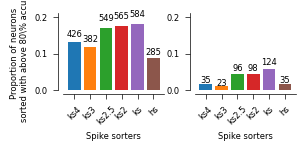

In [58]:
# parameters
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
sorters = ["ks4", "ks3", "ks2.5", "ks2", "ks", "hs"]
THR = 0.8

# plot
fig, ax = plt.subplots(1, 2, figsize=(3, 1))
# npx
ax[0], ylim, good_npx, total_npx = plot_total_sorting_accuracy_npx(
    ax[0], ac_nb, ac_ns, ac_e, THR, sorters, colors
)
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_ylabel("Proportion of neurons \nsorted with above 80\% accuracy")

# dense
ax[1], good_dense, total_dense = plot_sorting_accuracy_dense(
    ax[1], ac_d1, ac_d2, ac_d3, THR, sorters, ylim, colors
)
ax[1].set_ylabel("")
ax[1].tick_params(axis='x', labelrotation=45)

# tidy up
plt.subplots_adjust(wspace=0.3, hspace=0)
# save
utils.savefig("figures/2_causes/assets/fig6A_total_sorting_accuracy2.svg")

### Hyp. Testing: spike sorters have the same accuracies

* Chi-square goodness-of-fit test
    * we have large sample size: >>> 5 per sorters
    * count values between sorters are independents
    * data are converted to frequencies which is expected by scipy.stats.chisquare (not ratio)
    * degree of freedom = k - 1 - ddof, where ddof=0, an adjustment parameter
    * $\chi^2$(degree of freedom, sample size) = statistic, p-value.

In [18]:
# report chi-square stats

# NPX PROBE

ddof = 0  # default adjustment of the degree of freedom
dof = len(good_npx) - 1 - ddof  # the degree of freedom
result = stats.chisquare(f_obs=good_npx / total_npx * 100, ddof=0)
print("\nNPX:")
print("expected sorting accuracy:", np.round(np.mean(good_npx / total_npx * 100)), "%")
print(
    f"\chi^2 ({dof}, {total_npx})={np.round(result.statistic,1)}, p={np.round(result.pvalue,2)}"
)

# DENSE PROBE

ddof = 0  # default adjustment of the degree of freedom
dof = len(good_dense) - 1 - ddof  # the degree of freedom
result = stats.chisquare(f_obs=good_dense / total_dense * 100, ddof=0)
print("\nDENSE:")
print(
    "expected sorting accuracy:", np.round(np.mean(good_dense / total_dense * 100)), "%"
)
print(
    f"\chi^2 ({dof}, {total_dense})={np.round(result.statistic,1)}, p={np.round(result.pvalue,2)}"
)


NPX:
expected sorting accuracy: 15.0 %
\chi^2 (5, 3190)=4.9, p=0.43

DENSE:
expected sorting accuracy: 3.0 %
\chi^2 (5, 2180)=6.0, p=0.3


### Plot unit accuracy curve

nb of S ground truth units: 250
nb of NS ground truth units: 1388
nb of E ground truth units: 1552
nb of DS ground truth units: 2180


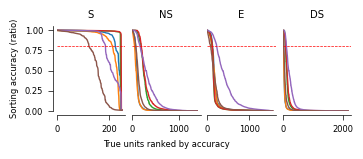

In [29]:
# compute dense probe dataset
acc_dense = np.hstack([ac_d1, ac_d2, ac_d3])
acc_dense_sort = acc_dense
for ix in range(acc_dense.shape[0]):
    acc_dense_sort[ix, :] = sorted(acc_dense[ix, :], reverse=True)

# PLOT

fig, ax = plt.subplots(1, 4, figsize=(3.8, 1.1))
ax[0].plot(ac_nb.T, "-", markersize=1.5, linewidth=1)
ax[1].plot(ac_ns.T, "-", markersize=1.5, linewidth=1)
ax[2].plot(ac_e.T, "-", markersize=1.5, linewidth=1)
ax[3].plot(acc_dense_sort.T, "-", markersize=1.5, linewidth=1)

# set titles
ax[0].set_title("S")
ax[1].set_title("NS")
ax[2].set_title("E")
ax[3].set_title("DS")

# labels
ax[0].set_ylabel("Sorting accuracy (ratio)")
ax[1].set_xlabel("True units ranked by accuracy")

# legend: loop over panels
for ix in range(len(ax)):

    # disconnect axes (R style)
    ax[ix].spines[["right", "top"]].set_visible(False)
    ax[ix].spines["bottom"].set_position(("axes", -0.05))
    ax[ix].yaxis.set_ticks_position("left")
    ax[ix].spines["left"].set_position(("axes", -0.05))
    ax[ix].spines["right"].set_visible(False)
    ax[ix].set_xlim(left=0)
    ax[ix].set_ylim(bottom=0)
    if ix > 0:
        ax[ix].spines["left"].set_visible(False)
        ax[ix].set_yticks([])

    # plot threshold for accurate units
    ax[ix].axhline(y=THR, color="r", linestyle="--")

# tidy up
plt.subplots_adjust(wspace=0.1, hspace=0)

# save
#utils.savefig("figures/2_causes/assets/fig6B_unit_accuracy_vs_exp.svg")
utils.savefig("figures/2_causes/assets/fig6B_unit_accuracy_vs_exp2.svg")

# report stats
print("nb of S ground truth units:", ac_nb.shape[1])
print("nb of NS ground truth units:", ac_ns.shape[1])
print("nb of E ground truth units:", ac_e.shape[1])
print("nb of DS ground truth units:", acc_dense.shape[1])

In [20]:
def get_good_unit_yield_and_accuracy(acc_data, sorter):
    sorters = np.array(["KS4", "KS3", "KS2.5", "KS2", "KS", "HS"])
    s_ix = np.where(sorters == sorter)[0][0]
    good_yield = sum(acc_data[s_ix, :] >= 0.8)
    acc = good_yield / acc_data.shape[1]
    print(f"{sorters[s_ix]} - accuracy {acc}; good unit yield {good_yield}")
    return acc, good_yield

In [21]:
acc_nb_k4, good_yiel_nb_k4 = get_good_unit_yield_and_accuracy(ac_nb, "KS4")
acc_nb_k3, good_yiel_nb_k3 = get_good_unit_yield_and_accuracy(ac_nb, "KS3")
acc_nb_k25, good_yiel_nb_k25 = get_good_unit_yield_and_accuracy(ac_nb, "KS2.5")
acc_nb_k2, good_yiel_nb_k2 = get_good_unit_yield_and_accuracy(ac_nb, "KS2")
acc_nb_ks, good_yiel_nb_ks = get_good_unit_yield_and_accuracy(ac_nb, "KS")
acc_nb_hs, good_yiel_nb_hs = get_good_unit_yield_and_accuracy(ac_nb, "HS")

KS4 - accuracy 0.896; good unit yield 224
KS3 - accuracy 0.856; good unit yield 214
KS2.5 - accuracy 0.976; good unit yield 244
KS2 - accuracy 0.988; good unit yield 247
KS - accuracy 0.748; good unit yield 187
HS - accuracy 0.496; good unit yield 124


In [22]:
acc_ns_k4, good_yiel_ns_k4 = get_good_unit_yield_and_accuracy(ac_ns, "KS4")
acc_ns_k3, good_yiel_ns_k3 = get_good_unit_yield_and_accuracy(ac_ns, "KS3")
acc_ns_k25, good_yiel_ns_k25 = get_good_unit_yield_and_accuracy(ac_ns, "KS2.5")
acc_ns_k2, good_yiel_ns_k2 = get_good_unit_yield_and_accuracy(ac_ns, "KS2")
acc_ns_ks, good_yiel_ns_ks = get_good_unit_yield_and_accuracy(ac_ns, "KS")
acc_ns_hs, good_yiel_ns_hs = get_good_unit_yield_and_accuracy(ac_ns, "HS")

KS4 - accuracy 0.0569164265129683; good unit yield 79
KS3 - accuracy 0.040345821325648415; good unit yield 56
KS2.5 - accuracy 0.13688760806916425; good unit yield 190
KS2 - accuracy 0.14265129682997119; good unit yield 198
KS - accuracy 0.12536023054755044; good unit yield 174
HS - accuracy 0.058357348703170026; good unit yield 81


In [30]:
acc_e_k4, good_yiel_e_k4 = get_good_unit_yield_and_accuracy(ac_e, "KS4")
acc_e_k3, good_yiel_e_k3 = get_good_unit_yield_and_accuracy(ac_e, "KS3")
acc_e_k25, good_yiel_e_k25 = get_good_unit_yield_and_accuracy(ac_e, "KS2.5")
acc_e_k2, good_yiel_e_k2 = get_good_unit_yield_and_accuracy(ac_e, "KS2")
acc_e_ks, good_yiel_e_ks = get_good_unit_yield_and_accuracy(ac_e, "KS")
acc_e_hs, good_yiel_e_hs = get_good_unit_yield_and_accuracy(ac_e, "HS")

KS4 - accuracy 0.07925257731958762; good unit yield 123
KS3 - accuracy 0.07216494845360824; good unit yield 112
KS2.5 - accuracy 0.0740979381443299; good unit yield 115
KS2 - accuracy 0.07731958762886598; good unit yield 120
KS - accuracy 0.14368556701030927; good unit yield 223
HS - accuracy 0.05154639175257732; good unit yield 80


In [24]:
acc_ds_k4, good_yiel_ds_k4 = get_good_unit_yield_and_accuracy(acc_dense_sort, "KS4")
acc_ds_k3, good_yiel_ds_k3 = get_good_unit_yield_and_accuracy(acc_dense_sort, "KS3")
acc_ds_k25, good_yiel_ds_k25 = get_good_unit_yield_and_accuracy(acc_dense_sort, "KS2.5")
acc_ds_k2, good_yiel_ds_k2 = get_good_unit_yield_and_accuracy(acc_dense_sort, "KS2")
acc_ds_ks, good_yiel_ds_ks = get_good_unit_yield_and_accuracy(acc_dense_sort, "KS")
acc_ds_hs, good_yiel_ds_hs = get_good_unit_yield_and_accuracy(acc_dense_sort, "HS")

KS4 - accuracy 0.016055045871559634; good unit yield 35
KS3 - accuracy 0.01055045871559633; good unit yield 23
KS2.5 - accuracy 0.044036697247706424; good unit yield 96
KS2 - accuracy 0.044954128440366975; good unit yield 98
KS - accuracy 0.05688073394495413; good unit yield 124
HS - accuracy 0.016055045871559634; good unit yield 35


/tmp/ipykernel_291368/2235490606.py:11: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


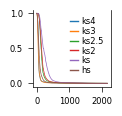

In [25]:
# setup legend
fig, ax = plt.subplots(1, 1, figsize=(1, 1))
ax.plot(acc_dense_sort.T, "-", markersize=1.5)
leg = plt.legend(
    ["ks4", "ks3", "ks2.5", "ks2", "ks", "hs"],
    frameon=False,
    handlelength=1,
    handletextpad=0.3,
    labelspacing=0.08,
)
for legobj in leg.legendHandles:
    legobj.set_linewidth(1)
utils.savefig("figures/2_causes/assets/fig6B_legend.svg")